# A case study on Boosting

Vehicle insurance fraud is done a lot across the world. People conspire to to make false or exaggerated claims involving property damage or stage personal injuries. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

You are the in house data scientist of the Boosting insurance company and are tasked to analyse this data and then create a model to predict the false claims.

## Data Dictionary

**'Month’** : Month when the claim was made.

**'WeekOfMonth'** : Week when the claim was made.

**'DayOfWeek'** : Day when the claim was made.

**'Make'**: Make of the car

**'AccidentArea'**, :  Area of the accident

**‘DayOfWeekClaimed'** :  Day of the week when claim was made

**'MonthClaimed'** : Month when claim was made

**'WeekOfMonthClaimed'** : In which week of the month, claim was made

**'Sex'** : Sex of the claimer 

**'MaritalStatus'**: Marital status of the claimer 

**'Age'** : age of the claimer

**'Fault'** :  Fault for which claim was made

**'PolicyType'** : Type of policy they hold  

**'VehicleCategory'** : Category of the vehicle

**'VehiclePrice'** : price of the vehicle

**'FraudFound_P'** : Fraud was found or not

**'PolicyNumber'** : Policy number of the claimer

**'RepNumber'** : Representative number

**Deductible'** : Deductible is the amount that a policy holder has to pay before the insurance company starts paying up.

**'DriverRating'** : Rating of the driver

**'Days_Policy_Accident'** :   Days since the accident

**'Days_Policy_Claim'** : days since the claim

**'PastNumberOfClaims'**:  Number of claims made in the past.

**'AgeOfVehicle'** :  Age of the vehicle

**'AgeOfPolicyHolder'** : Age of the policy holder

**'PoliceReportFiled'**:  Was police report filed or not

**'WitnessPresent'**:  Was a witness present there or not 

**'AgentType'** : type of the agent

**'NumberOfSuppliments'** : Number of supplements provided

**'AddressChange_Claim'** : Was address changed claim was made

**'NumberOfCars'** : Number of cars the claimer has 

**'Year'**:  year of the policy

**'BasePolicy'** : name of base policy


<h1><b>Table of Contents </b><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-case-study-on-Boosting" data-toc-modified-id="A-case-study-on-Boosting-1"><span class="toc-item-num"><b>1&nbsp;&nbsp;</span> <b>A case study on Boosting</b></a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num"><b>2&nbsp;&nbsp;</span><b>Exploratory Data Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Analysing-Categorical-Columns" data-toc-modified-id="Analysing-Categorical-Columns-2.0.1"><span class="toc-item-num"><b>2.0.1&nbsp;&nbsp;</span><b>Analysing Categorical Columns</a></span></li><li><span><a href="#Analysing-Frauds" data-toc-modified-id="Analysing-Frauds-2.0.2"><span class="toc-item-num"><b>2.0.2&nbsp;&nbsp;</span><b>Analysing Frauds</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.1"><span class="toc-item-num"><b>2.1&nbsp;&nbsp;</span><b>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Encoding-binary-categorical-features" data-toc-modified-id="Encoding-binary-categorical-features-2.1.1"><span class="toc-item-num"><b>2.1.1&nbsp;&nbsp;</span><b>Encoding binary categorical features</a></span></li><li><span><a href="#Ordinal-Encoder" data-toc-modified-id="Ordinal-Encoder-2.1.2"><span class="toc-item-num"><b>2.1.2&nbsp;&nbsp;</span><b>Ordinal Encoder</a></span></li><li><span><a href="#Custom-Encoding" data-toc-modified-id="Custom-Encoding-2.1.3"><span class="toc-item-num"><b>2.1.3&nbsp;&nbsp;</span><b>Custom Encoding</a></span></li></ul></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-3"><span class="toc-item-num"><b>3&nbsp;&nbsp;</span><b>Boosting</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bias-Variance-tradeoff" data-toc-modified-id="Bias-Variance-tradeoff-3.0.1"><span class="toc-item-num"><b>3.0.1&nbsp;&nbsp;</span><b>Bias Variance tradeoff</a></span><ul class="toc-item"><li><span><a href="#Bias" data-toc-modified-id="Bias-3.0.1.1"><span class="toc-item-num"><b>3.0.1.1&nbsp;&nbsp;</span><b>Bias</a></span></li><li><span><a href="#Variance" data-toc-modified-id="Variance-3.0.1.2"><span class="toc-item-num"><b>3.0.1.2&nbsp;&nbsp;</span><b>Variance</a></span></li></ul></li><li><span><a href="#Boosting-Explained" data-toc-modified-id="Boosting-Explained-3.0.2"><span class="toc-item-num"><b>3.0.2&nbsp;&nbsp;</span><b>Boosting Explained</a></span></li></ul></li></ul></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><b>Ada Boost</a></span><ul class="toc-item"><li><span><a href="#Decision-Stumps" data-toc-modified-id="Decision-Stumps-4.1"><span class="toc-item-num"><b>4.1&nbsp;&nbsp;</span><b>Decision Stumps</a></span></li><li><span><a href="#Adaboost-in-detail" data-toc-modified-id="Adaboost-in-detail-4.2"><span class="toc-item-num"><b>4.2&nbsp;&nbsp;</span><b>Adaboost in detail</a></span><ul class="toc-item"><li><span><a href="#Implementing-AdaBoost-in-Python" data-toc-modified-id="Implementing-AdaBoost-in-Python-4.2.1"><span class="toc-item-num"><b>4.2.1&nbsp;&nbsp;</span><b>Implementing AdaBoost in Python</a></span></li></ul></li></ul></li><li><span><a href="#Interpreting-Results-and-some-new-metrics" data-toc-modified-id="Interpreting-Results-and-some-new-metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><b>Interpreting Results and some new metrics</a></span><ul class="toc-item"><li><span><a href="#Introducing-Confusion-matrix" data-toc-modified-id="Introducing-Confusion-matrix-5.1"><span class="toc-item-num"><b>5.1&nbsp;&nbsp;</span><b>Introducing Confusion matrix</a></span></li><li><span><a href="#Classification-Metrics:-Precision-and-Recall" data-toc-modified-id="Classification-Metrics:-Precision-and-Recall-5.2"><span class="toc-item-num"><b>5.2&nbsp;&nbsp;</span><b>Classification Metrics: Precision and Recall</a></span></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Implementing-Gradient-Boosting-in-Scikit-learn" data-toc-modified-id="Implementing-Gradient-Boosting-in-Scikit-learn-6.1"><span class="toc-item-num"><b>6.1&nbsp;&nbsp;</span><b>Implementing Gradient Boosting in Scikit learn</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Summarising-it-all" data-toc-modified-id="Summarising-it-all-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><b>Summarising it all</a></span></li></ul></li></ul></div>

In [1]:
#import pandas for data related work
import pandas as pd
#import numpy for numerical computation
import numpy as np
#import pyplot for our plotting needs
import matplotlib.pyplot as plt

#Import ordinalEncoder, we wil learn about this in this case study
from sklearn.preprocessing import OrdinalEncoder
#import train test split
from sklearn.model_selection import train_test_split


# Exploratory Data Analysis

In [2]:
#load the data
data= pd.read_csv("fraud_oracle.csv")

In [3]:
#lets look at the data's shape
data.shape

(15420, 33)

In [4]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [6]:
#Get basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
#transpose if a nice way of describing the data, we just need to do a .T after the dataframe
#mathematically transpose means mean rows and columns and vice- versa
#When we are describing the data, transpose helps as it brings the statistical terms above as columns.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


Few interesting points to note:

1. As can be seen in the FraudFound_P column, the mean is 0.059857 which is more towards the 0 than 1, 
hence we can conclude that the data has more 0 cases than 1 cases

2. The mean of the Age column is 39.85 which tells 40 year olds are making more claims on an average.

3. Rest all numeric column don't make sense to interpret statistically as they are merely numbers or dates with no unique statistic value, for example mean or std dev of RepNumber makes no sense

### Analysing Categorical Columns

In [8]:
#This is one simple way of finding out all the object columns
objectList=data.select_dtypes(include=['object']).columns.tolist()
print(objectList)
#There will be one more way of filtering the object type columsns, learn more in this case study later!

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


What we are going to do is analyse all the categorical columns,in the command above, we just got all the categorical columns out, by looking at the all the columns with the dataype "object.

Now we are simply going to plot the histograms of all such columns. 
This gives us a very good primary insight

In [9]:
# for col in objectList:
    
#     plt.figure(figsize=(10,6))
#     plt.title(col)
#     data[col].value_counts().plot(kind="bar", color=['salmon', 'lightblue'])

We could do all of this in a loop so the number of plots become too much in a single series, and it becomes terribly difficult to scroll back and forth on the data.

So instead of doing this on a loop, we will analyse these columns one by one and write our insights.
I have written down the command to do this though commented above.


We will analyse columns manually now and in beetween we will read the conclusions too.

<AxesSubplot: title={'center': 'Month'}>

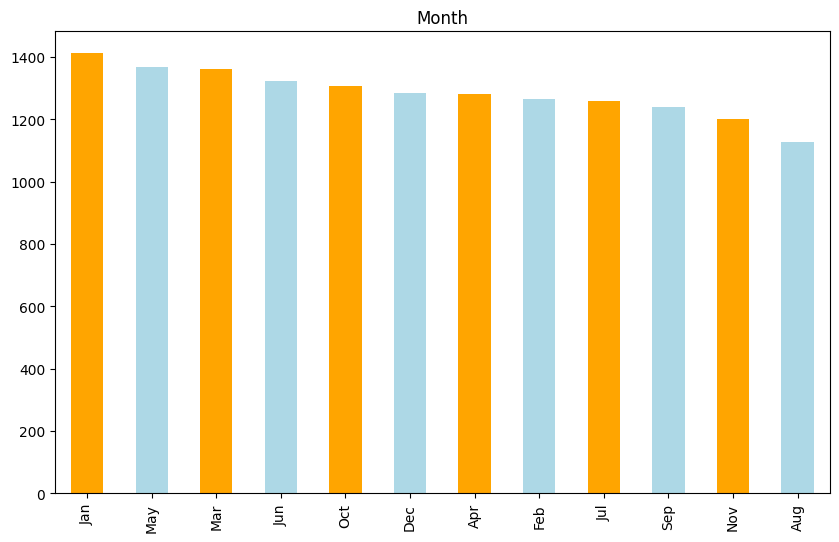

In [10]:
#Lets plot the Month column first
plt.figure(figsize=(10,6))
plt.title("Month")
data["Month"].value_counts().plot(kind="bar", color=['orange', 'lightblue'])

<AxesSubplot: title={'center': 'DayOfWeek'}>

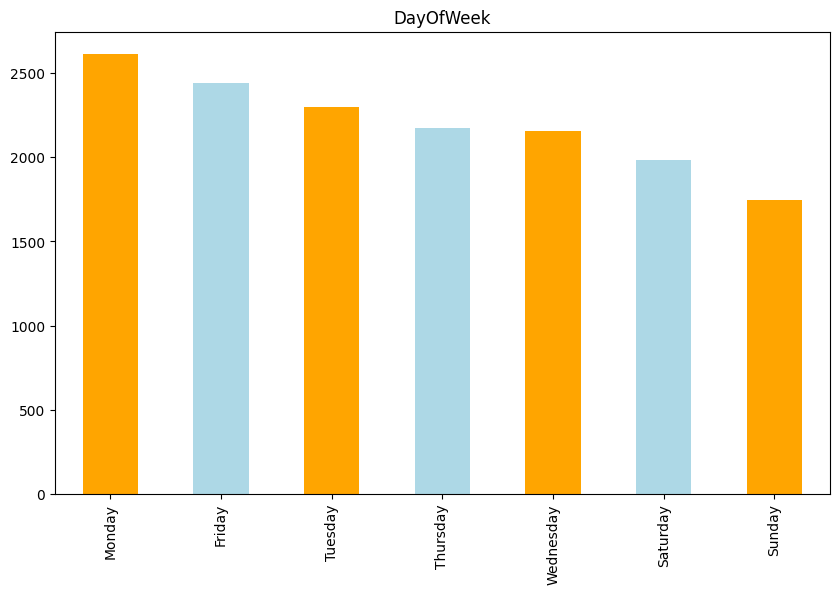

In [11]:
#Lets plot the DayOfWeek column 
plt.figure(figsize=(10,6))
plt.title("DayOfWeek")
data["DayOfWeek"].value_counts().plot(kind="bar", color=['orange', 'lightblue'])

Lets talk about conclusions from the above analysis so far.

Most months and days are showing similar number of claims. So no big insight there

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


<AxesSubplot: title={'center': 'Make'}>

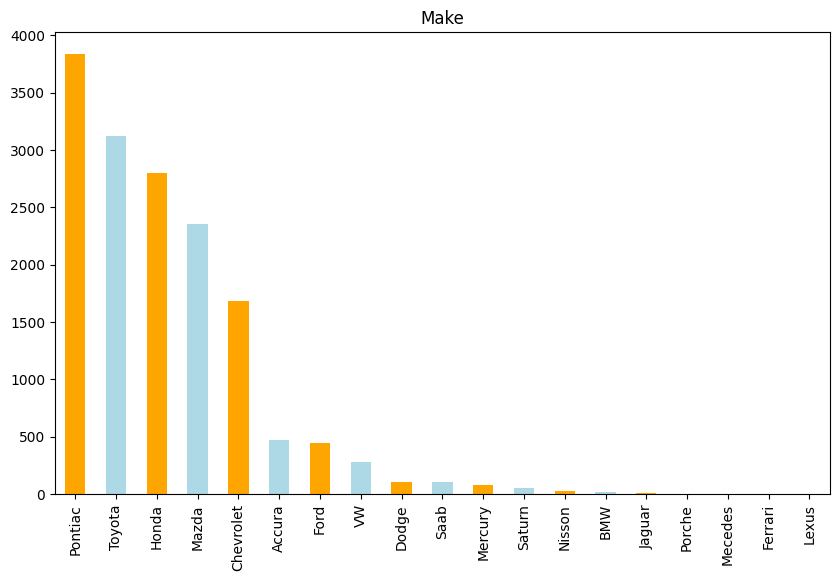

In [12]:
#Plotting the car make
plt.figure(figsize=(10,6))
plt.title("Make")
data["Make"].value_counts().plot(kind="bar", color=['orange', 'lightblue'])

So interestingly Pontiac owners are making the most insurance claims, so we do need to report to the business that they need to be careful about these people.

<AxesSubplot: title={'center': 'AccidentArea'}>

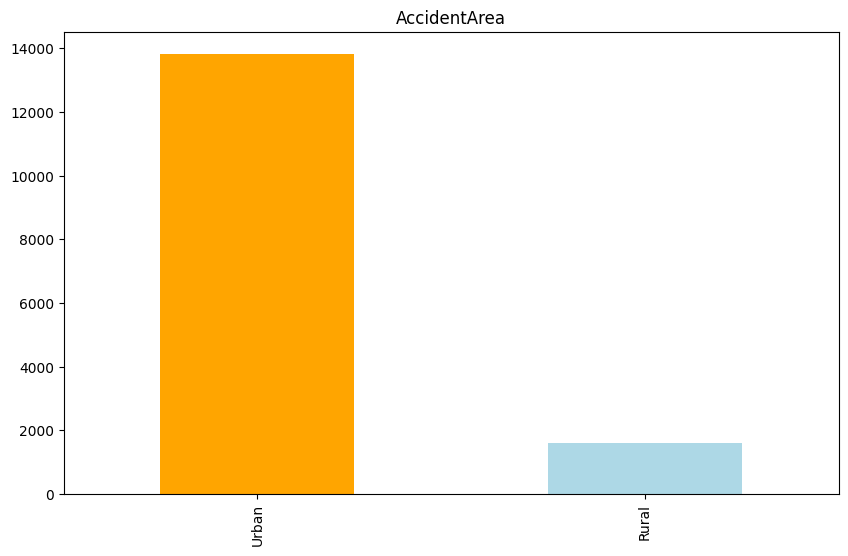

In [13]:
#PLotting the AccidentArea Column
plt.figure(figsize=(10,6))
plt.title('AccidentArea')
data['AccidentArea'].value_counts().plot(kind="bar", color=['orange', 'lightblue'])

Most claims are happening from Accidents in Urban areas, interestlingly. Strong insight!

<AxesSubplot: title={'center': 'DayOfWeekClaimed'}>

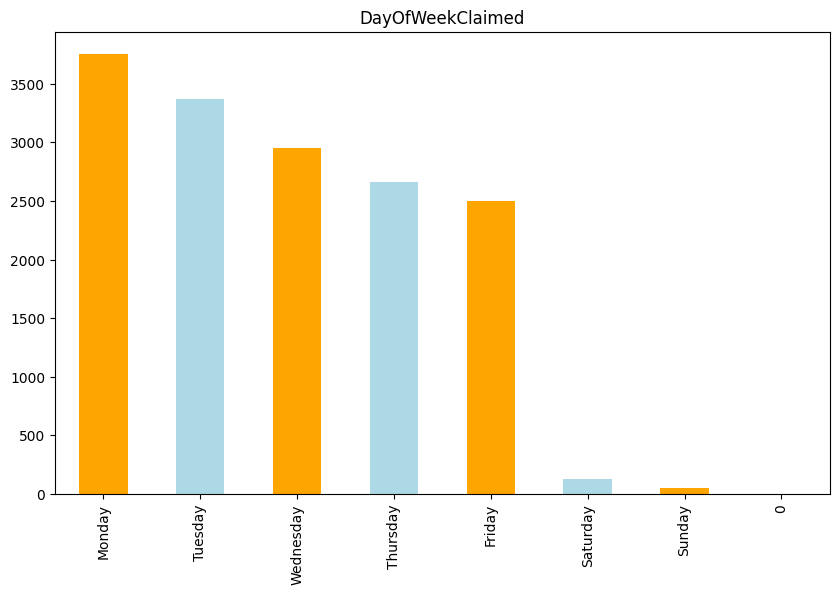

In [14]:
# plotting the 'DayOfWeekClaimed', 
    
plt.figure(figsize=(10,6))
plt.title('DayOfWeekClaimed')
data['DayOfWeekClaimed'].value_counts().plot(kind="bar", color=['orange', 'lightblue'])

<AxesSubplot: title={'center': 'MonthClaimed'}>

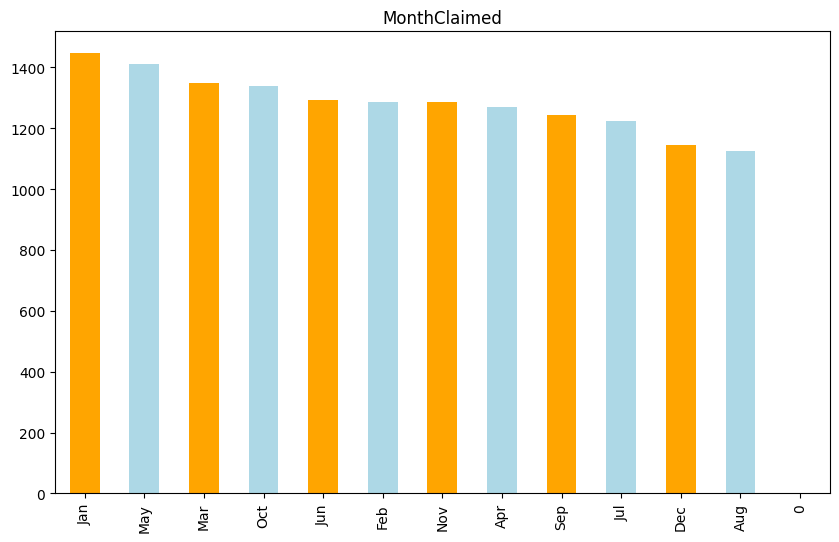

In [15]:
#plotting the month claimed
plt.figure(figsize=(10,6))
plt.title('MonthClaimed')
data['MonthClaimed'].value_counts().plot(kind="bar", color=['orange', 'lightblue'])

Not a very strong insight here except that people are not making much claims on the weekends!


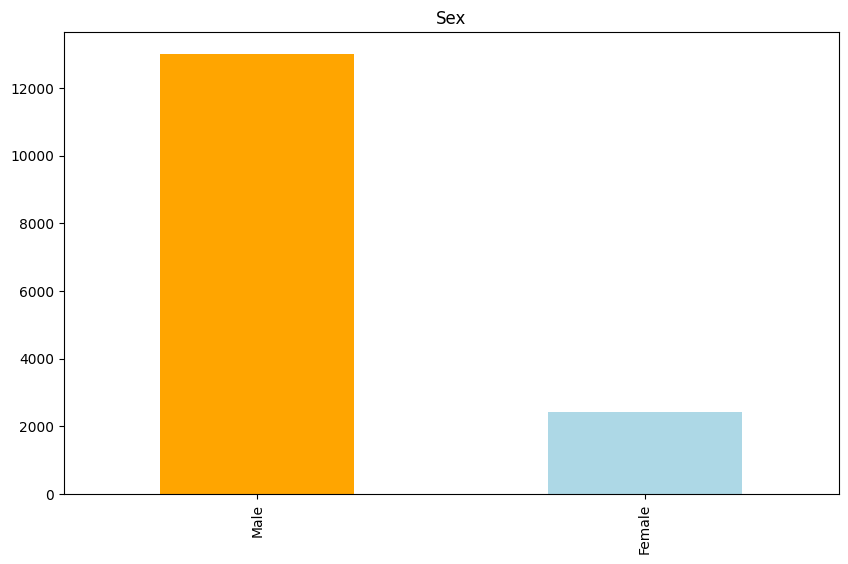

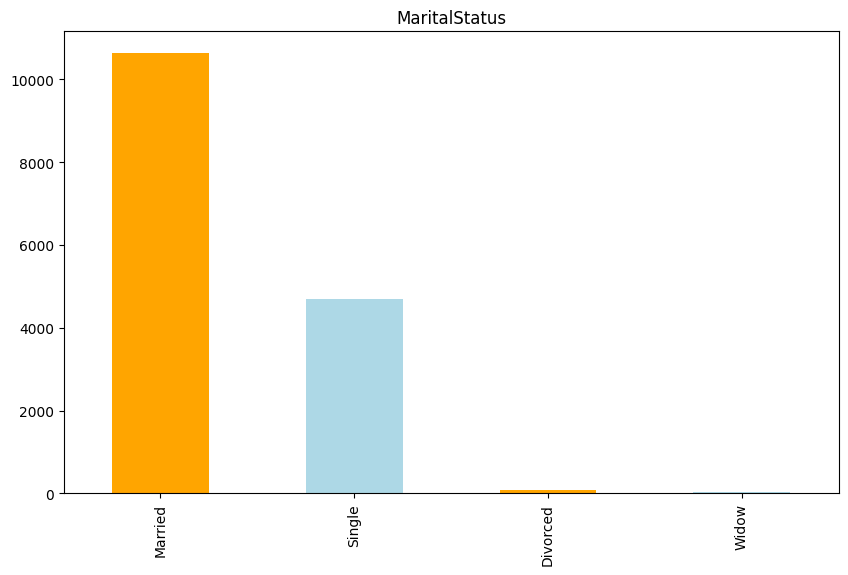

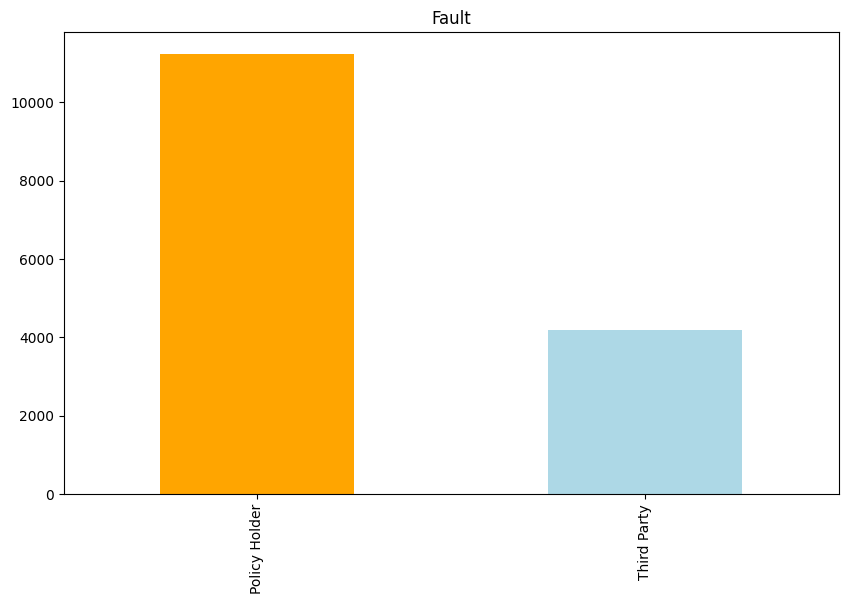

In [16]:
#plotting the sex, maritalStatus and Fault columns
cols=['Sex', 'MaritalStatus', 'Fault']
for col in cols:
    plt.figure(figsize=(10,6))
    plt.title(col)
    data[col].value_counts().plot(kind="bar", color=['orange', 'lightblue'])

Ok a number of insights from these plots:

1. Males are making more claims than females
2. Married people are making more claims
3. Policy holders are doing more claims than third parties

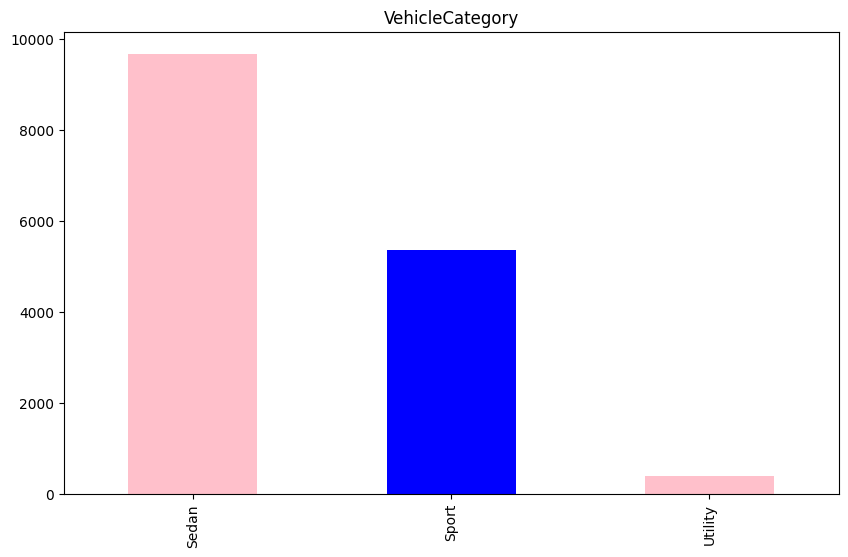

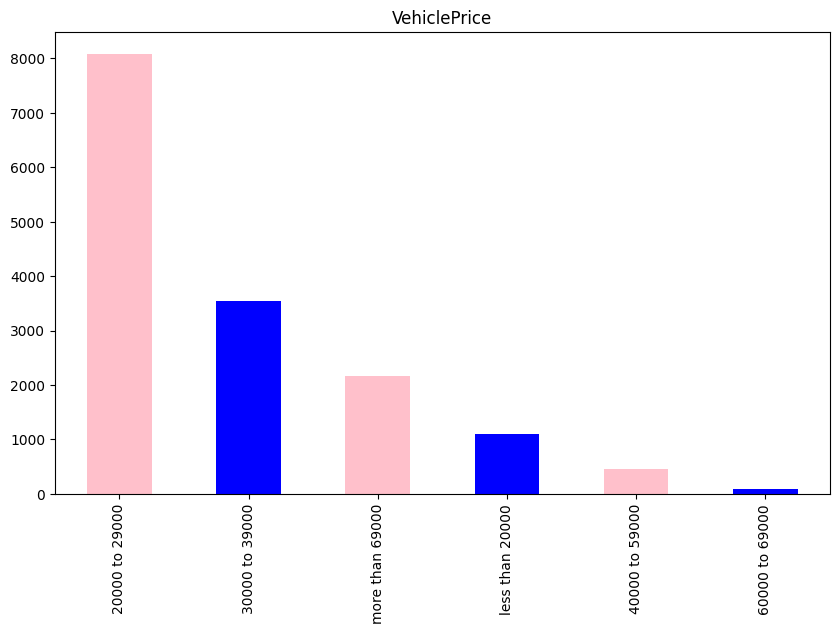

In [17]:
#plotting the 'VehicleCategory', 'VehiclePrice'
cols=['VehicleCategory', 'VehiclePrice']
for col in cols:
    plt.figure(figsize=(10,6))
    plt.title(col)
    data[col].value_counts().plot(kind="bar", color=['pink', 'blue'])

Ah nice insights here too!

Sedans have the most claims, so we really need to be careful from the sedan owners
Also most claims are made in the 20k- 29k category, again a category to be careful.

You are welcome to check out more columns, We feel these columns are enough to give you an idea on how to draw insights from these columns

### Analysing Frauds

In this section, we are going to analyse the remaining few columns and use some new techniques to do.
Also we are only going to be analysing the data where Frauds are indeed found.

The purpose is to give you more tools to analyse and make decisions on the data

In [18]:
#Lets look at the frauds we have by driver rating
data.groupby(['FraudFound_P'])['DriverRating'].count()

FraudFound_P
0    14497
1      923
Name: DriverRating, dtype: int64

<AxesSubplot: >

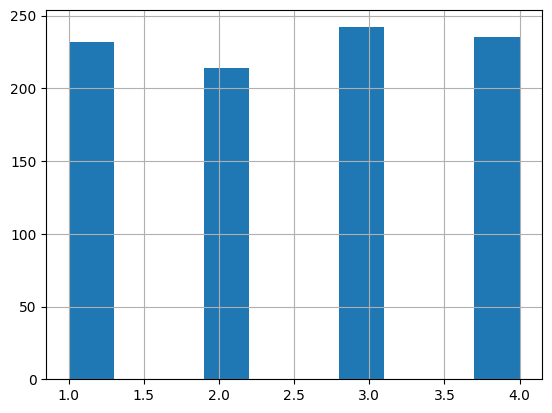

In [19]:
# Plot the histogram of Driver rating when frauds are found
data[data["FraudFound_P"]==1].DriverRating.hist()

OK, so usually driver rating 3.0 is doing most frauds!

<AxesSubplot: >

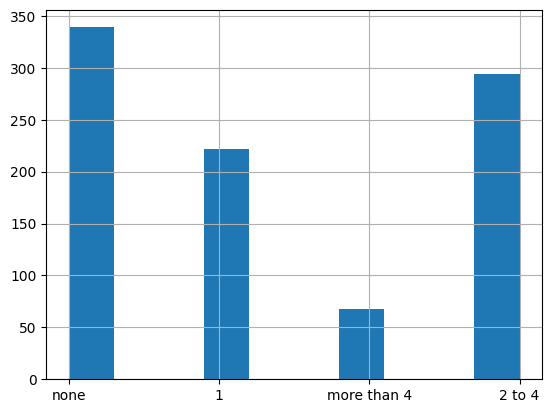

In [20]:
# Similar plot as above but with PastNumberOfClaims column
data[data["FraudFound_P"]==1].PastNumberOfClaims.hist()

**So interesting!!**

Most number of frauds are done by people who have made no previous claims. Wow, counter to what you'd usually expect

<AxesSubplot: >

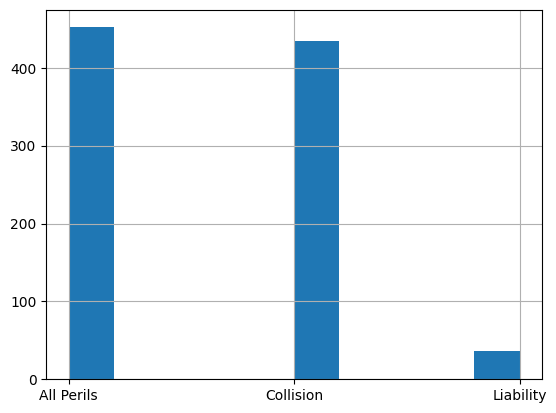

In [21]:
#plotting frauds with FraudFound
data[data["FraudFound_P"]==1].BasePolicy.hist()

All perils policy type is the one to be careful!

## Feature Engineering

### Encoding binary categorical features

We start small and first take care of the binary features, and encode them with 0s and 1s:

AccidentArea:
1=Urban, 0=Rural

Sex:
1=Female, 0=Male

Fault:
1=Policy Holder, 0=Third Party

PoliceReportFiled:
1=Yes, 0=No

WitnessPresent:
1=Yes, 0=No

AgentType:
1=External 0=Internal

We learn a new way of encoding binary variables in this section

In [22]:
#list all the cols we mentioned above. 
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
#We now create 2 lists, these lists  help us create 0 and 1 values for our col values later
#Aval is for 1, Bval is those we assign 0 to.
Aval = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
Bval = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

#We just now loop over each column in the above list and assign 1 to our Avals and 0 to bVals.
for i in range(len(cols)):
    X_idx1 = data[cols[i]]==Aval[i]
    X_idx2 = data[cols[i]]==Bval[i]

    data.loc[list(X_idx1),cols[i]]=1
    data.loc[list(X_idx2),cols[i]]=0

In [23]:
#lets look at the data again now to see what happened
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,1,Single,...,3 years,26 to 30,0,0,1,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,0,Single,...,6 years,31 to 35,1,0,1,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,0,Married,...,7 years,41 to 50,0,0,1,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,0,Married,...,more than 7,51 to 65,1,0,1,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,1,Single,...,5 years,31 to 35,0,0,1,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,1,Tuesday,Nov,5,0,Married,...,6 years,31 to 35,0,0,1,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,1,Friday,Dec,1,0,Married,...,6 years,31 to 35,0,0,1,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,0,Friday,Dec,1,0,Single,...,5 years,26 to 30,0,0,1,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,1,Thursday,Dec,2,1,Married,...,2 years,31 to 35,0,0,1,more than 5,no change,1 vehicle,1996,All Perils


### Ordinal Encoder
In this section we learn about a new type of encoding called Ordinal Encoder, this is done for categorical variables. Ordinal encoder takes care of encoding non binary type of categorical variables i.e which can't be encoded to 0-1

The idea behind ordinal encoder is that for all the columns we pass, it will replace the text with nunmbers starting 0 and till the end of the unique values' list.
So if we have the values "A,B,C" in the column, the orinal encoder will make it 0,1,2

In [24]:
#lets create the OrdinalEncoder object imported earlier above
enc = OrdinalEncoder()
#we make a list of all the columns on which we want to make ordinalEncoding
ordinalList=["Month","DayOfWeek", "DayOfWeekClaimed","MonthClaimed","PastNumberOfClaims","NumberOfSuppliments",'Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']
#fit the ordinalEncoder to this data.
data[ordinalList] = enc.fit_transform(data[ordinalList])
#lets look at the data first.
data


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2.0,5,6.0,6.0,1,6.0,5.0,1,1,2.0,...,3 years,26 to 30,0,0,1,3.0,1 year,3 to 4,1994,2.0
1,4.0,3,6.0,6.0,1,2.0,5.0,4,0,2.0,...,6 years,31 to 35,1,0,1,3.0,no change,1 vehicle,1994,1.0
2,10.0,5,0.0,6.0,1,5.0,10.0,2,0,1.0,...,7 years,41 to 50,0,0,1,3.0,no change,1 vehicle,1994,1.0
3,6.0,2,2.0,17.0,0,1.0,6.0,1,0,1.0,...,more than 7,51 to 65,1,0,1,2.0,no change,1 vehicle,1994,2.0
4,4.0,5,1.0,6.0,1,6.0,4.0,2,1,2.0,...,5 years,31 to 35,0,0,1,3.0,no change,1 vehicle,1994,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9.0,4,0.0,17.0,1,6.0,10.0,5,0,1.0,...,6 years,31 to 35,0,0,1,3.0,no change,1 vehicle,1996,1.0
15416,9.0,5,4.0,13.0,1,1.0,3.0,1,0,1.0,...,6 years,31 to 35,0,0,1,2.0,no change,3 to 4,1996,2.0
15417,9.0,5,4.0,17.0,0,1.0,3.0,1,0,2.0,...,5 years,26 to 30,0,0,1,0.0,no change,1 vehicle,1996,1.0
15418,2.0,1,1.0,17.0,1,5.0,3.0,2,1,1.0,...,2 years,31 to 35,0,0,1,2.0,no change,1 vehicle,1996,0.0


### Custom Encoding

For some columns, we can't do the encoding straightaway, we need custom values to those strings, for them we use the custom encoding below. 

In [25]:
#We create a dictionary estabilishing the connection between the unique col vlaues and the value we want
# to assign them
col_map = [{'Days_Policy_Accident':{'more than 30':31,'15 to 30':22.5,'none':0,'1 to 7':4,'8 to 15':11.5}},
    {'Days_Policy_Claim':{'more than 30':31,'15 to 30':22.5,'8 to 15':11.5,'none':0}},
    {'AgeOfPolicyHolder':{'26 to 30':28,'31 to 35':33,'41 to 50':45.5,'51 to 65':58,'21 to 25':23,'36 to 40':38,'16 to 17':16.5,
                                          'over 65':66,'18 to 20':19}},
    {'AddressChange_Claim':{'1 year':1,'no change':0,'4 to 8 years':6,'2 to 3 years':2.5,'under 6 months':0.5}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
    {'VehiclePrice': {'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'AgeOfVehicle':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}}
           
]
#We create a data copy, since its always good to create a data copy when transforming columns. 
newData = data.copy()
#now we just loop over the required columns, and replace them with the needed values
for i in range(len(col_map)):
    newData.replace(col_map[i], inplace=True)

In [26]:

#lets look at the datatypes now to see how many obhject values do we still have remaining
newData.dtypes

Month                   float64
WeekOfMonth               int64
DayOfWeek               float64
Make                    float64
AccidentArea             object
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus           float64
Age                       int64
Fault                    object
PolicyType              float64
VehicleCategory         float64
VehiclePrice              int64
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims      float64
AgeOfVehicle              int64
AgeOfPolicyHolder       float64
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments     float64
AddressChange_Claim     float64
NumberOfCars            float64
Year    

We still have a few columns remaining, lets see.


In [27]:
#this is another way of looking at the object data, other than what we learnt earlier
newData.loc[:, newData.dtypes == object].columns

Index(['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent',
       'AgentType'],
      dtype='object')

Oops, even though these are numerical columns, they are objects type.
We can handle them in one command, nothing to worry!

In [28]:
#We use the above technique to convert all the reamaining columns who are by values by numeric
#but data type is object
objCols=newData.loc[:, newData.dtypes == object].columns
newData[objCols]=newData[objCols].apply(pd.to_numeric)

In [29]:
newData.dtypes

Month                   float64
WeekOfMonth               int64
DayOfWeek               float64
Make                    float64
AccidentArea              int64
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus           float64
Age                       int64
Fault                     int64
PolicyType              float64
VehicleCategory         float64
VehiclePrice              int64
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims      float64
AgeOfVehicle              int64
AgeOfPolicyHolder       float64
PoliceReportFiled         int64
WitnessPresent            int64
AgentType                 int64
NumberOfSuppliments     float64
AddressChange_Claim     float64
NumberOfCars            float64
Year    

**Perfect we have everything in either float or int now. Lets talk about the modelling now and learn a new technique!**

# Boosting

So if you have already gone through the RandomForest case study, you must have heard about the term Bagging.
If not nothing to worry!

Bagging reduces variance, boosting reduces bias.
Wait what's bias and variance?

Lets see!

### Bias Variance tradeoff

So after training machine learning models, usually models errors are a combination of 3 things:

Error= Bias + Variance+ Irreducible error

lets not worry about Irreducible error for now.

Lets talk about Bias and Variance

#### Bias

Bias is the average of difference between the model prediction and the actual value we are trying to predict.
Models with high bias are basically that have oversimplified the problem and are not doing good on both train and test.

High bias means underfitting models

#### Variance
Variance is the versatility of the model. High variance means the model is doing good of training data but failing terribly on test data.

High variance means overfitting models

So we have established now, both bias and variance, and since this case study is concerned about boosting, lets focus on reducing bias.

 ### Boosting Explained

So we are looking to reduce bias i.e a strong model. For simplicity lets talk about classifier models.
We are looking to build a strong classifier with low bias.

The idea behind boosting is pretty simple. Can we build a strong classifier using a number of weak classifiers.
The answer is yes! we can. We start with a simple classifier, make predicition on it and when we add another classifier, we try to do better on the data points we misclassified in the last one



# Ada Boost 

We will start with learning a simple boosting algorithm called Adaboost.

Adaboost or Adaptive boosting works on a simple concept that is behind boosting, i.e lets take together all the weak performers and ensemble them to make a strong classifier. The idea is simple, we run a simple weak classifier first then see how many bad predictions did it make? Then we assign weights to those bad prediction data points, now bad points are weighted. 
Now we create another classifier, this time with weighted data, more weights to the wrongly classified data points from the last model and less to the correct ones. 
The adaboost algorithm now randomly selects data points based on the weights assigned. 
So automatically the data points with more weights are choosen in the dataset for our new classifier. The new classifier now tries to improve and predict those more weighted points.

This process is repeated for a number of steps until a low overall training error is achieved. 

This is a high level overview of adaboost, lets understand the technicalities. 

Lets understand decision stumps first.

## Decision Stumps
A decision stump is a simple binary classifier or a simple decision tree that just does one split and predicts a 0 or 1 value. Decision stumps are weak classifiers that we are going to ensemble in adaboost to build our way to a strong classifier.



## Adaboost in detail

So how Adaboost works is that we start by giving equal weight to every data point in our data and that weight is given by $ w(i)=\frac{1}{N}\$ initially. So lets say if I had 5 data points, all will have the weight of 1/5 each.

Then we run a number of decision stumps on the data, and the stump or the decision tree that gives us the least amount of Gini's impurity (a function to measure the quality of a tree) is choosen.
So lets say in 5 data points, my choosen decision stump classified 4 out of 5 correctly. I now have 4 correct and 1 incorrect data points.

Next step is to calculate the performance of the stump or amount of say. This number is given by $ \alpha $

$ \alpha\ =\frac{1}{2}\ \log_e\ \frac{1-Total error}{Total error} $

So for misclassified data points we assign the weight as per this formula:
$ New weight= old weight * e^{\pm\alpha} $

The amount of say (alpha) will be negative when the sample is correctly classified. Hence lower New weight

The amount of say (alpha) will be positive when the sample is miss-classified.Hence higher New weight

So for next iteration, my weights will be updated and then since the algorithm makes a random selection based on weights, these misclassified examples will have higher chance of getting picked.



 And that brings us to the end of Adaboost! 
 Since this algorithm is designed based on misclassified data points this does have a risk of overfitting

### Implementing AdaBoost in Python

In [112]:
# lets create summary lists. We will use these lists at the end to summarise all the models
precisionList=[]
recallList=[]
accuracyList=[]
modelList=[]

#dont worry about the names of these lists right now, we will learn about them in a while!

In [113]:
#lets create our training data now. 
y=newData.FraudFound_P
X=newData.drop('FraudFound_P', axis=1)

In [114]:
#do the train test split, stratify means do stratified sampling using the y column
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42)



In [115]:
#import Scikit learn's Ada boosting classifier
from sklearn.ensemble import AdaBoostClassifier
#create the classifier object
clf = AdaBoostClassifier(random_state=0).fit(X_train, y_train)

In [116]:
#lets do the predictions
preds = clf.predict(X_test)

In [117]:
# print accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("AdaBoost")

Accuracy: 0.9333333333333333


# Interpreting Results and some new metrics

We got good accuracy but does is that the only metric we should be looking at? NO!
When it comes to classification problems, we are more interested in more results than just accuracy.

Accuracy may not give you the most correct interpretion. Why? If we look at the classifiers we are looking to classify data as either 0,1 for example.

If we just stick to accuracy, our classifier could just predict all the 0 classes and give us 98% accuracy. Does that mean we are doing good? No!
We are looking to classify fraud claims for example in this case, we keep classifying the 0 class i.e non fraud customers and get a 93% accuracy doing so it doesnt solve our purpose. 
We need to classifiy fraudlent cases i.e the 1 class. 

Accuracy doesnt gives us a picture of how good are we doing classwise. There are many metrics to solve this problem. Today we will look at a simple one. Confusion matrix.



## Introducing Confusion matrix

Confusion matrix gives us an easy way to display the results. 
We can see where 0 was the real truth and 0 was predicted, Similarly where 1 was the truth and 1 was predicted.
Other 2 cases would be where predictions were wrong i.e 0 was predicted instead of 1 and vice versa.

In [118]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm = confusion_matrix(y_test, preds, labels=clf.classes_)

In [119]:
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=clf.classes_)

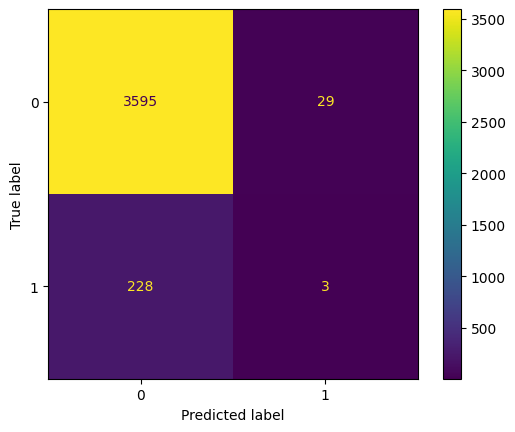

In [120]:
#show the plot
disp.plot()
plt.show()

##### This clearly shows:
1. In 3595 cases, we predicted that Fraud was not done class as and it was indeed not done, this is called **True Negative**
2. In 223 cases we predicted that Fraud was not done even though Fraud was done, this is a **False negative** ,also called **Type 2 error**
3. In 29 cases, we predicted that Fraud was done, even though fraud was not done, this is called **False positive**, also called **Type 1 error**
4. In 3 cases, we predicted fraud was done and it was indeed done, this is a **True positive**

## Classification Metrics: Precision and Recall

We define some new metrics apart from Accuracy. Introducing precision and recall:

**Precision** : $ \frac{True Positive}{True positive + False positive}\ $

**Recall**: $ \frac{True Positive}{True positive + False negative}\ $

Precision and Recall both provide us with a new level of results for our data.
In simpler terms, precision tells us how good are our results, it gives us percentage of the results that are relevant.

Recall tells us the percentage of relevant results correctly classified by our algorithm.



In our case, recall matters, we are interested in finding fraud cases, so we can't afford some false negatives ie cases when fraud was done but we predicted fraud wasnt done. But we can indeed afford false positives, i.e cases when we said fraud was done but actually fraud never happened. Such cases can be let go by careful business analysis later.
So at the end we should be looking to optimise recall.

In [121]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.09375
recall 0.012987012987012988





Interestingly we have high accuracy but such terrible precision recall when we use Adaboost! So we do need to do something better!

Lets look at another boosting algorithm

# Gradient Boosting

Adaboost was the first boosting algorithm. Later, people tried to optimise this idea of boosting further and redefined boosting as a numerical optimisation problem and called it gradient boosting.

The idea is to add weak learners such that we minimise a loss function using a gradient descent like procedure.

Lets understand Gradient boosting step by step, we will understand this algorithm by taking a regression example, because regression version of this algorithm is easier to understand than classification.

1. Lets say we are trying to predict a regression variable, lets call it y.
2. Initially, we make a bad prediction of this variable as the mean of this column, also called $ \bar{y} $, lets call our initial prediction as $ F_0 $
3. We then look at the residuals of this, i.e the difference between the prediction and actuals, lets call this  $ r_1 $ where  $ r_1 = y- F_0 $
4. Now we build our first weak model, we could use decision stumps as earlier, or we could use proper Decision trees with more depth as well. Prcatically in Gradient boosting, we use proper decision trees for the sake of this case study lets use simple stumps.
5. So now we have a decision which is trying to predict the residuals or $ r_1 $ not the actual y, we try to predict $ r_1 $ and call our prediction $ \gamma_{1} $. We do our actual prediction of y by adding the $ F_0 $ and  $ \gamma_{1} $. So our first prediction becomes, $ F_1= F_0 +  \gamma_{1} $ Actually we don't directly add the $ \gamma_{1} $ we rather add a scaled version, scaled by something called learning rate or v. So final first model becomes $ F_1= F_0 + v  \gamma_{1} $
6. In the next step, we use $ F_1 $ instead of $ F_0$ and calculate the residuals between $ F_1 $ and y, so now we get $ r_2 = y- F_1 $ , now we create a new model which tries to predict the residuals $ r_2 $ and hence the new prediction $ \gamma_{2} $. and we get the new model  $ F_2= F_1 + v  \gamma_{2} $


This process is repeated until model stops improving. 

Mathematically, this is how Gradient boosting is defined

Input: training set $ {\displaystyle \{(x_{i},y_{i})\}_{i=1}^{n},}{\displaystyle \{(x_{i},y_{i})\}_{i=1}^{n},} $ a differentiable loss function $ {\displaystyle L(y,F(x)),}{\displaystyle L(y,F(x)),} $ number of iterations M.

Algorithm:

1. Initialize model with a constant value:
$ {\displaystyle F_{0}(x)={\underset {\gamma }{\arg \min }}\sum _{i=1}^{n}L(y_{i},\gamma ).} $
2. For m = 1 to M:
 
 
 2.1 Compute so-called pseudo-residuals:
${\displaystyle r_{im}=-\left[{\frac {\partial L(y_{i},F(x_{i}))}{\partial F(x_{i})}}\right]_{F(x)=F_{m-1}(x)}\quad {\mbox{for }}i=1,\ldots ,n.} $ 

2.2 Fit a base learner (or weak learner, e.g. tree) closed under scaling $ {\displaystyle h_{m}(x)}{\displaystyle h_{m}(x)} $ to pseudo-residuals, i.e. train it using the training set $ {\displaystyle \{(x_{i},r_{im})\}_{i=1}^{n}}\{(x_i, r_{im})\}_{i=1}^n. $


2.3 Compute multiplier $ {\displaystyle \gamma _{m}}\gamma _{m} $ by solving the following one-dimensional optimization problem:
$ {\displaystyle \gamma _{m}={\underset {\gamma }{\operatorname {arg\,min} }}\sum _{i=1}^{n}L\left(y_{i},F_{m-1}(x_{i})+\gamma h_{m}(x_{i})\right).} $


Update the model:
$ {\displaystyle F_{m}(x)=F_{m-1}(x)+\gamma _{m}h_{m}(x).} $


Output $ {\displaystyle F_{M}(x).} $

## Implementing Gradient Boosting in Scikit learn

In [122]:
#import Scikit learn's Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
#create the classifier object
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [123]:
#lets do the predictions
preds = clf.predict(X_test)

In [124]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("Gradient Boosting")

Accuracy: 0.94189364461738


In [125]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm = confusion_matrix(y_test, preds, labels=clf.classes_)



In [126]:
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=clf.classes_)

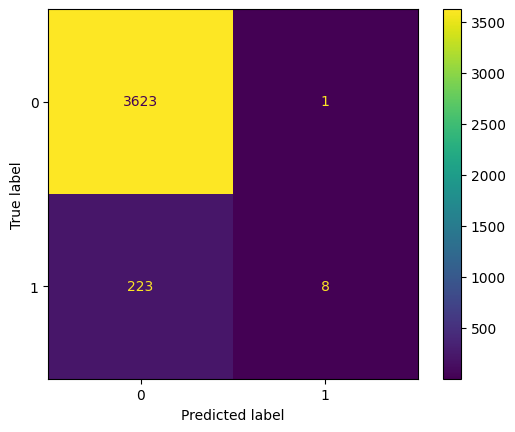

In [127]:
#show the plot
disp.plot()
plt.show()

In [128]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.8888888888888888
recall 0.03463203463203463


Our precision is 88% ! which is quite an improvement from the Adaboost. Recall is terrible though still at 3%

We are doing  good just by using default values of Gradient boosting. We can further improve this by doing Hyperparameter tuning using GRID search or Random Search. 
We are skipping the code for that due to the already long length of this case study. 

# XGBoost

One slight improvement over Gradient boosting that came in recently is the xgboost library. Both xgboost and gbm follows the principle of gradient boosting. There are however, the difference in modeling details. Specifically, xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost. For model, it might be more suitable to be called as regularized gradient boosting.


_source https://datascience.stackexchange.com/questions/16904/gbm-vs-xgboost-key-differences_ 

Lets implement XGBoost!

In [129]:
# import xgboost
import xgboost as xgb

In [130]:
# create an XG Boost classifier
xg_reg = xgb.XGBClassifier( n_estimators = 10)

Lets look at some of the XG boost hyperparameters

**booster [default= gbtree ]**
Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.

**verbosity [default=1]**
Verbosity of printing messages. Valid values are 0 (silent), 1 (warning), 2 (info), 3 (debug). Sometimes XGBoost tries to change configurations based on heuristics, which is displayed as warning message. If there’s unexpected behaviour, please try to increase value of verbosity.

**validate_parameters [default to false, except for Python, R and CLI interface]**
When set to True, XGBoost will perform validation of input parameters to check whether a parameter is used or not.

**nthread [default to maximum number of threads available if not set]**
Number of parallel threads used to run XGBoost. When choosing it, please keep thread contention and hyperthreading in mind.

**disable_default_eval_metric [default= false]**
Flag to disable default metric. Set to 1 or true to disable.

**num_feature [set automatically by XGBoost, no need to be set by user]**
Feature dimension used in boosting, set to maximum dimension of the feature



**eta [default=0.3, alias: learning_rate]**

Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
range: [0,1]

**gamma [default=0, alias: min_split_loss]**

Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
range: [0,∞]

**max_depth [default=6]**

Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. exact tree method requires non-zero value.
range: [0,∞]

For the complete list, please visit this page:
https://xgboost.readthedocs.io/en/stable/parameter.html


In [131]:
# Fit and predict from the model
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [132]:
# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("XGBoost")

Accuracy: 0.9421530479896238


In [133]:
# create the confusion matrix
cm = confusion_matrix(y_test, preds, labels=clf.classes_)

In [134]:
# lets get the precision and recall numbers using confusion matrix itself

CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 1.0
recall 0.03463203463203463


In [135]:
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=clf.classes_)


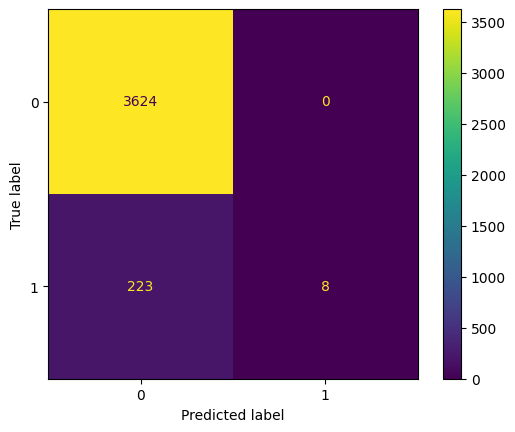

In [136]:
disp.plot()

Interestingly we have acheieved  100 training precision using XG Boost!

## Summarising it all

In [139]:
# We create a final list to collate all the results so far
finalList= [modelList, accuracyList, precisionList, recallList]
# final dataframe to see all the results.
pd.DataFrame(finalList, index=['Model', 'Accuracy', 'Precision', 'Recall']).T

,Model,Accuracy,Precision,Recall
0,AdaBoost,0.933333,0.09375,0.012987
1,Gradient Boosting,0.941894,0.888889,0.034632
2,XGBoost,0.942153,1.0,0.034632


As you can see, all the models have pros and cons, Adaboost is the worst overall. Gradient boosting and XG Boost are giving similar accuracy and Recall but different precision.

Also please understand this is plain xgboost with default parameters, if we run grid search and obtain correct parameters, there will be much better results than this